### Libraries

In [55]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Strategy
from backtesting import Backtest
import talib as ta
from backtesting.lib  import crossover
from datetime    import datetime

### OHLC data and EDA

In [56]:
# read in csv data
df = pd.read_csv("EURUSD_Daily_201201020000_202112310000.csv",sep="\t")
# create 'date' columns as datetime obj
df['date'] = pd.to_datetime(df['<DATE>'])
# drop unwanted columns
df.drop(columns=['<DATE>','<TICKVOL>','<VOL>', '<SPREAD>'], inplace=True)
# rename columns
df.columns = ['open','high','low','close','date']
# set date as index 
df.set_index('date', inplace=True)
df.shape

(2661, 4)

### RSI - Momentun indicator

In [77]:
class RSICross(Strategy):
    upper  = 70
    lower  = 30
    window = 14
        
    def init(self):
        self.rsi = self.I(ta.RSI, self.data.Close, self.window)
                
    def next(self):
        
        if crossover(self.lower,self.rsi):
                self.position.close()
                self.buy()
                        
        elif crossover(self.rsi, self.upper):
                self.position.close()
                self.sell()

In [78]:
# rename to match Backtesting library
df.columns = ['Open', 'High', 'Low', 'Close']
backtest = Backtest(df, RSICross, cash=10000,commission=.002)
stats, heatmap = backtest.optimize(
    upper=range(70,80,5),
    lower=range(20,30,5),
    window=range(14,25,1),
    maximize='Win Rate [%]',
    return_heatmap=True)

  0%|          | 0/22 [00:00<?, ?it/s]

In [79]:
stats

Start                     2012-01-02 00:00:00
End                       2021-12-31 00:00:00
Duration                   3651 days 00:00:00
Exposure Time [%]                   13.866967
Equity Final [$]                 10425.814855
Equity Peak [$]                  10530.005095
Return [%]                           4.258149
Buy & Hold Return [%]              -12.113996
Return (Ann.) [%]                    0.395683
Volatility (Ann.) [%]                2.180112
Sharpe Ratio                         0.181497
Sortino Ratio                         0.27084
Calmar Ratio                          0.06866
Max. Drawdown [%]                   -5.762912
Avg. Drawdown [%]                   -1.203517
Max. Drawdown Duration      369 days 00:00:00
Avg. Drawdown Duration       51 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                       4.258551
Worst Trade [%]                      4.258551
Avg. Trade [%]                    

In [81]:
stats[27]

<Strategy RSICross(upper=75,lower=20,window=22)>

In [82]:
hm1 = heatmap.groupby(['window','upper']).mean().unstack()
hm2 = heatmap.groupby(['window','lower']).mean().unstack()
hm3 = heatmap.groupby(['upper','lower']).mean().unstack()

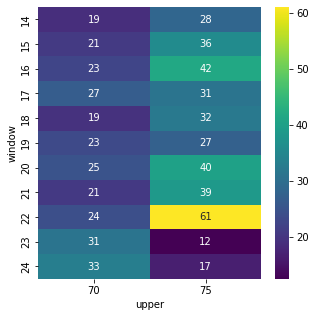

In [83]:
plt.figure(figsize=(5,5))
sns.heatmap(hm1, cmap='viridis', annot=True);

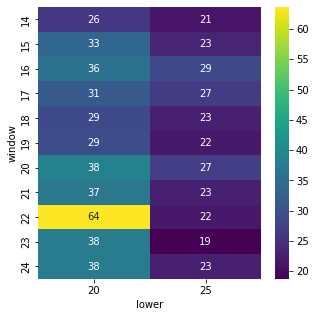

In [84]:
plt.figure(figsize=(5,5))
sns.heatmap(hm2, cmap='viridis', annot=True);

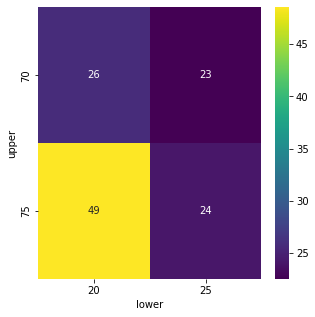

In [85]:
plt.figure(figsize=(5,5))
sns.heatmap(hm3, cmap='viridis', annot=True);

### EMA - Trend Indicator

In [112]:
class EmaCross(Strategy):
    n1 = 21
    n2 = 50
    n3 = 100
        
    def init(self):
        self.ema1 = self.I(ta.EMA, self.data.Close, self.n1)
        self.ema2 = self.I(ta.EMA, self.data.Close, self.n2)
        self.ema3 = self.I(ta.EMA, self.data.Close, self.n3)
        
    def next(self):
        
        if self.ema1 > self.ema2 > self.ema3:
            if crossover(self.ema1,self.ema3):
                self.position.close()
                self.buy()
                        
        elif self.ema1 < self.ema2 < self.ema3:
            if crossover(self.ema3, self.ema1):
                self.position.close()
                self.sell()

In [113]:
backtest = Backtest(df, EmaCross, cash=10000,commission=.002)
stats, heatmap = backtest.optimize(
    n1=range(10, 50, 10),
    n2=range(50, 100, 10),
    n3=range(100, 201, 10),
    maximize='Win Rate [%]',
    return_heatmap=True)

  0%|          | 0/17 [00:00<?, ?it/s]

In [114]:
stats

Start                     2012-01-02 00:00:00
End                       2021-12-31 00:00:00
Duration                   3651 days 00:00:00
Exposure Time [%]                   91.582112
Equity Final [$]                 11099.431829
Equity Peak [$]                  11833.113669
Return [%]                          10.994318
Buy & Hold Return [%]              -12.113996
Return (Ann.) [%]                    0.992713
Volatility (Ann.) [%]                6.238538
Sharpe Ratio                         0.159126
Sortino Ratio                        0.231385
Calmar Ratio                         0.070441
Max. Drawdown [%]                  -14.092731
Avg. Drawdown [%]                   -2.007404
Max. Drawdown Duration     1837 days 00:00:00
Avg. Drawdown Duration      158 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      10.995267
Worst Trade [%]                     10.995267
Avg. Trade [%]                    

In [116]:
stats[27]

<Strategy EmaCross(n1=10,n2=50,n3=190)>

In [117]:
hm1 = heatmap.groupby(['n1','n2']).mean().unstack()
hm2 = heatmap.groupby(['n1','n3']).mean().unstack()
hm3 = heatmap.groupby(['n2','n3']).mean().unstack()

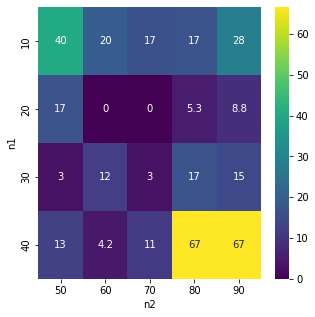

In [118]:
plt.figure(figsize=(5,5))
sns.heatmap(hm1, cmap='viridis', annot=True);

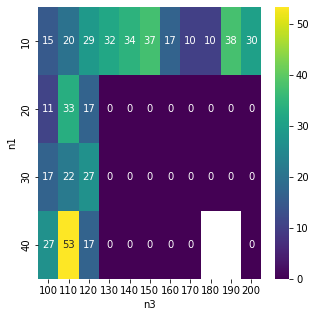

In [119]:
plt.figure(figsize=(5,5))
sns.heatmap(hm2, cmap='viridis', annot=True);

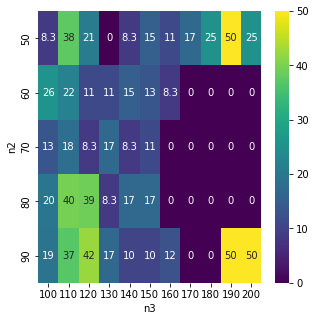

In [120]:
plt.figure(figsize=(5,5))
sns.heatmap(hm3, cmap='viridis', annot=True);